<a href="https://colab.research.google.com/github/Enkhzol/diveintocode-ml/blob/master/Sprint1_ML_flow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. About this Sprint​ ​**

**The purpose of this Sprint**

    Know the practical flow of machine learning
    Complete a model with high generalization performance


How to learn

After making it possible to perform careful verification, we will proceed with model creation with high generalization performance, referring to the solution of others.

**2. Machine learning flow**

Using Kaggle's Home Credit Default Risk competition as a starting point, we will learn the practical flow of machine learning. In particular, we will aim to complete a model with a high generalisation performance and appropriate validation.​ ​

Home Credit Default Risk | Kaggle
https://www.kaggle.com/c/home-credit-default-risk

**[Problem 1] Cross Validation**

In the pre-learning period, the verification data was divided first, and the index value was calculated for that, and verification was performed. (Holdout method) However, the accuracy varies depending on the division method; in practice Cross Validation. This is a method of performing splitting multiple times and performing learning and verification for each. KFold class is provided in scikit-learn for splitting multiple times.

Create and execute code that Validation baseline model created in the pre-learning period assignment
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold

In [ ]:
#THIS EXAMPLE IS SHOWN 2-FOLD CROSS VALIDATION:

import numpy as np
from sklearn.model_selection import KFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4])
kf = KFold(n_splits=2)
kf.get_n_splits(X)

print("kf = ",kf)

for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    print("X_train = ", X_train)
    print("y_train = ", y_train)
    print("X_test = ", X_test)
    print("y_test = ", y_test)

kf =  KFold(n_splits=2, random_state=None, shuffle=False)
TRAIN: [2 3] TEST: [0 1]
X_train =  [[1 2]
 [3 4]]
y_train =  [3 4]
X_test =  [[1 2]
 [3 4]]
y_test =  [1 2]
TRAIN: [0 1] TEST: [2 3]
X_train =  [[1 2]
 [3 4]]
y_train =  [1 2]
X_test =  [[1 2]
 [3 4]]
y_test =  [3 4]


**[Problem 2] Grid search**

So far, I haven't touched on the classifier parameters and used the default settings. Details of the parameters will be learned in future sprints. As a prerequisite for machine learning, it is necessary to select the optimum parameters according to the situation. Searching for the optimum parameters is called parameter tuning. A simple way to automate parameter tuning to some extent is grid search.

Please use Scikit-learn's GridSearchCV to create the code for grid search. Then do some parameter tuning on the baseline model. Please refer to the official documentation of the method used to determine which parameters to tune.

sklearn.model_selection.GridSearchCV — scikit-learn 0.21.3 documentation
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

To the GridSearchCV class, give the model, the search range, and the number of divisions for cross Validation as arguments. You don't need to use KFold class if you want to use it as it also includes cross Validation functionality.

In [ ]:
#PRINTING BEST PARAMETERS FROM THE DEFINED GRID SEARCH:

from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
iris = datasets.load_iris()
#parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
  {'C': [1, 10, 100, 1000], 'kernel': ['poly'], 'degree':[2,3,4,5]},
 ]

svc = svm.SVC()
clf = GridSearchCV(svc, param_grid)
clf.fit(iris.data, iris.target)

print("Best parameters: " ,clf.best_estimator_)


sorted(clf.cv_results_.keys())

Best parameters:  SVC(C=1, degree=2, kernel='poly')


['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_C',
 'param_degree',
 'param_gamma',
 'param_kernel',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

[Problem 3] Survey from Kaggle Notebooks

Find and list different ideas from Kaggle's Notebooks.

**EXAMPLE: **

**https://www.youtube.com/watch?v=VaJEK6fycwM**


https://www.kaggle.com/docs/notebooks

[Problem 4] Creating a model with high generalization performance

Please combine the idea found in Problem 3 and your own idea to create a model with high generalization performance.

As a process, please summarize in a table what you did and how much the cross Validation results changed.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import kurtosis
from scipy.stats import skew
import pylab as pl

application_train = pd.read_csv('/content/drive/MyDrive/my_sample_data/application_train_few.csv')
application_test = pd.read_csv('/content/drive/MyDrive/my_sample_data/application_test_few.csv')

application_train = pd.DataFrame(application_train)
application_test = pd.DataFrame(application_test)

print(application_train.shape)
print(application_test.shape)

from sklearn.model_selection import train_test_split

app_train1 = application_train.loc[:, ['SK_ID_CURR', 'AMT_INCOME_TOTAL','DAYS_BIRTH', 'TARGET']]
app_test1 = application_test.loc[:, ['SK_ID_CURR', 'AMT_INCOME_TOTAL','DAYS_BIRTH']]

#learning data and verification data
X_train, X_test, Y_train, Y_test = train_test_split(np.array(app_train1.iloc[:, [0, 1, 2]])
                                                         , np.array(app_train1.iloc[:, [3]]), random_state = 0)

print(X_train.shape)

Y_train = Y_train.reshape(-1)
Y_test = Y_test.reshape(-1)

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, Y_train)
Y_pred= clf.predict_proba(X_test)[:, 1]

from sklearn.metrics import roc_auc_score
print('roc score:', roc_auc_score(Y_test, Y_pred))

(20217, 122)
(2247, 121)
(15162, 3)
roc score: 0.5897238010245218


[Problem 5] Final model selection

Ultimately, choose a model that says it's good and submit the estimated results to Kaggle to see your score. Please describe what kind of idea you adopted and what the score was.

In [1]:
import pandas as pd
import numpy as np
#from sklearn.model_selection import GridSearchCV
#from sklearn.svm import SVC

application_train = pd.read_csv('/content/drive/MyDrive/my_sample_data/application_train.csv')
application_test = pd.read_csv('/content/drive/MyDrive/my_sample_data/application_test.csv')

application_train = pd.DataFrame(application_train)
application_test = pd.DataFrame(application_test)

print("Train : " ,application_train.shape)
print("Test : ", application_test.shape)

#from sklearn.model_selection import train_test_split

app_train1 = application_train.loc[:, ['SK_ID_CURR', 'AMT_INCOME_TOTAL','DAYS_BIRTH', 'TARGET']]
app_test1 = application_test.loc[:, ['SK_ID_CURR', 'AMT_INCOME_TOTAL','DAYS_BIRTH']]

#learning data and verification data
#X_train, X_test, Y_train, Y_test = train_test_split(np.array(app_train1.iloc[:, [0, 1, 2]])
#                                                         , np.array(app_train1.iloc[:, [3]]), test_size=0.25, random_state = 0)

X_train = np.array(app_train1.iloc[:, [0, 1, 2]])
Y_train = np.array(app_train1.iloc[:, [3]])

X_test = np.array(app_test1.iloc[:, [0, 1, 2]])
X_test_IDs = np.array(app_test1.iloc[:, [0]])

#print(X_train.shape)

Y_train = Y_train.reshape(-1)
#Y_test = Y_test.reshape(-1)

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=2, random_state=0)

# IT TAKES TIME
# Set the parameters by cross-validation
#tuned_parameters = [
#    {"kernel": ["rbf"], "gamma": [1e-3, 1e-4], "C": [1, 10, 100, 1000]},
#    {"kernel": ["linear"], "C": [1, 10, 100, 1000]}
#]

#clf = GridSearchCV(SVC(), tuned_parameters)

clf.fit(X_train, Y_train)
#print("Best parameters set found on development set:")
#print(clf.best_params_)

Y_pred= clf.predict_proba(X_test)[:, 1]

Y_pred = Y_pred[:, np.newaxis]

print(X_test_IDs.shape)
print(Y_pred.shape)

#print("X_test_IDs ", X_test_IDs)
#print("Y_pred ", Y_pred)

testID_with_predictions = np.array([['SK_ID_CURR'] , ['TARGET']])

i = 0
while(i < len(X_test_IDs)):
  testID_with_predictions = np.append(testID_with_predictions, [[X_test_IDs[i]] , [Y_pred[i]]])
  i = i + 1

testID_with_predictions = testID_with_predictions.reshape((len(X_test_IDs) + 1,2))

print("testID_with_predictions ", testID_with_predictions[0:10])

c = np.asarray(testID_with_predictions)
pd.DataFrame(c).to_csv('/content/drive/MyDrive/my_sample_data/testID_with_predictions.csv')
print("Created CSV file.")


Train :  (307511, 122)
Test :  (48744, 121)
(48744, 1)
(48744, 1)
testID_with_predictions  [['SK_ID_CURR' 'TARGET']
 ['100001.0' '0.20004582772397128']
 ['100005.0' '0.07102945478436534']
 ['100013.0' '0.06886952414462802']
 ['100028.0' '0.07288591747820931']
 ['100038.0' '0.09168217586084161']
 ['100042.0' '0.06444708086648783']
 ['100057.0' '0.07102945478436534']
 ['100065.0' '0.09498258715092132']
 ['100066.0' '0.07777266727405299']]
Created CSV file.


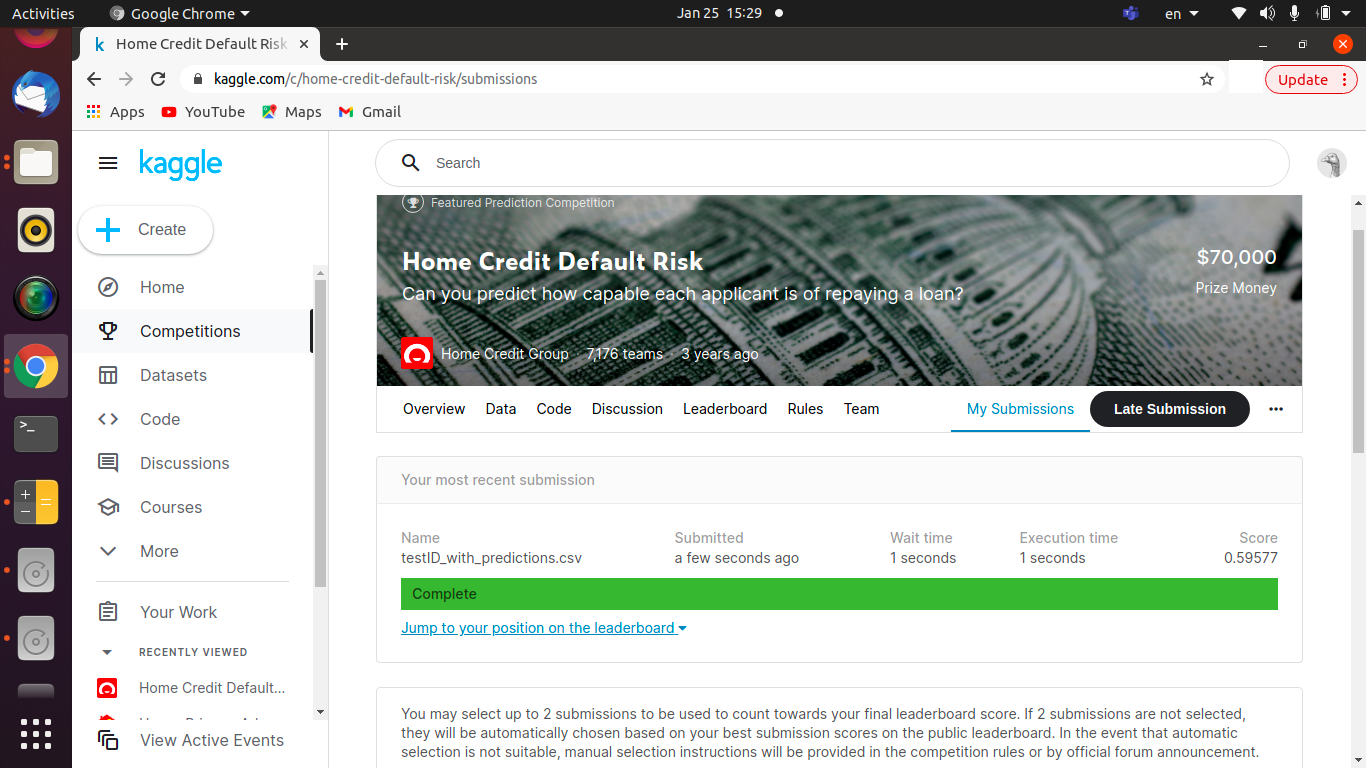